In [30]:
with open('data.txt') as f:
    data = f.read()

In [289]:
test_cases = [
    # initial
    '''.#.#...|#.
.....#|##|
.|..|...#.
..|#.....#
#.#|||#|#|
...#.||...
.|....|...
||...#|.#|
|.||||..|.
...#.|..|.''',
    # 1 minute
    '''.......##.
......|###
.|..|...#.
..|#||...#
..##||.|#|
...#||||..
||...|||..
|||||.||.|
||||||||||
....||..|.''',
    # 10 minutes
    '''.||##.....
||###.....
||##......
|##.....##
|##.....##
|##....##|
||##.####|
||#####|||
||||#|||||
||||||||||'''
]

In [230]:
import numpy as np
import itertools

In [26]:
def convert_text_to_grid(text):
    data = text.split('\n')
    grid = np.array([list(d) for d in data])
    return grid

In [245]:
def find_neighbors(row, col, grid):
    max_row, max_col = grid.shape
    pts = list(itertools.product([row-1, row, row+1], [col-1, col, col+1]))
    keep = []
    for pt in pts:
        if pt[0] >= 0 and pt[0] < max_row and pt[1] >= 0 and pt[1] < max_col and pt != (row, col):
            p = grid[pt]
            keep.append(p)
    return keep

- each acre can be either open ground `.` trees `|` or a lumberyard `#`
- An open acre will become filled with trees if three or more adjacent acres contained trees. Otherwise, nothing happens.
- An acre filled with trees will become a lumberyard if three or more adjacent acres were lumberyards. Otherwise, nothing happens.
- An acre containing a lumberyard will remain a lumberyard if it was adjacent to at least one other lumberyard and at least one acre containing trees. Otherwise, it becomes open.

In [266]:
def find_next_land_type(row, col, grid):
    acre = grid[row, col]
    neighbors = find_neighbors(row, col, grid)
    if acre == '.':
        if len([n for n in neighbors if n == '|']) >= 3:
            return '|'
    if acre == '|':
        if len([n for n in neighbors if n == '#']) >= 3:
            return '#'
    if acre == '#':
        if '#' in neighbors and '|' in neighbors:
            return '#'
        return '.'
    return acre

In [302]:
def update_grid(grid):
    rows, cols = grid.shape
    new_grid = [[find_next_land_type(r, c, grid) for c in range(cols)] for r in range(rows)]
    return np.array(new_grid)

In [303]:
test_grids = list(map(convert_text_to_grid, test_cases))

In [304]:
def reforestation(forest, minutes=10):
    grid = forest
    for m in range(minutes):
        grid = update_grid(grid)
    return grid

In [307]:
assert test_grids[0].tolist() == reforestation(test_grids[0], minutes=0).tolist()
assert test_grids[1].tolist() == reforestation(test_grids[0], minutes=1).tolist()
assert test_grids[2].tolist() == reforestation(test_grids[0], minutes=10).tolist()

In [311]:
def resource_value(forest):
    num_trees = len([x for x in forest.flatten() if x == '|'])
    num_lumber = len([x for x in forest.flatten() if x == '#'])
    return num_trees * num_lumber

In [312]:
pt_one_forest = reforestation(convert_text_to_grid(data), minutes=10)
print("Part One:", resource_value(pt_one_forest))

Part One: 644640


In [320]:
# try to see if pattern has already been seen
forest = convert_text_to_grid(data)
counter = 0
seen = [forest.tolist()]
for i in range(1000000000):
    forest = update_grid(forest)
    if forest.tolist() not in seen:
        seen.append(forest.tolist())
        counter += 1
    else:
        break
print(counter)

598


In [321]:
1000000000 % counter

480

In [329]:
print("Part Two:", resource_value(np.array(seen[1000000000 % counter + 1])))

Part Two: 183911


In [343]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

In [349]:
forest = convert_text_to_grid(data)
seen = [forest.tolist()]
for i in range(2000):
    forest = update_grid(forest)
    seen.append(forest.tolist())

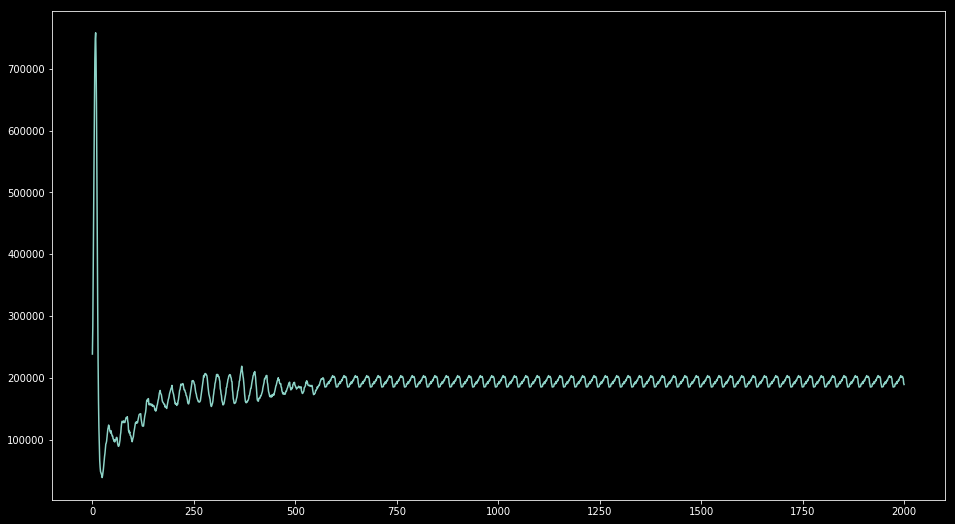

In [365]:
rv = [resource_value(np.array(s)) for s in seen]
x = list(range(len(rv)))
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(x, rv)

In [366]:
len(set(rv))

570

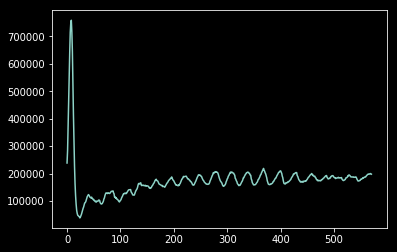

In [369]:
plt.plot(x[:571], rv[:571])

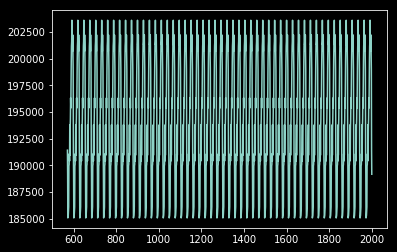

In [370]:
plt.plot(x[571:], rv[571:])

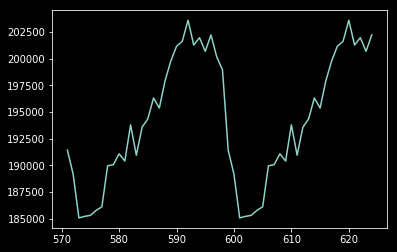

In [372]:
plt.plot(x[571:625], rv[571:625])

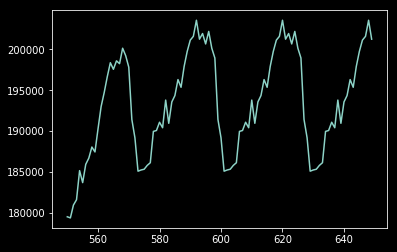

In [377]:
plt.plot(x[550:650], rv[550:650])

In [405]:
uniq_nums = set()
uniq_at = []
for i, v in enumerate(rv):
    if v not in uniq_nums:
        uniq_nums.add(v)
        uniq_at.append(i)

In [406]:
max(uniq_at)

598

In [429]:
# how long is cycle?
cycle_nums = set()
for i in range(max(uniq_at), len(rv)):
    if rv[i] not in cycle_nums:
        cycle_nums.add(rv[i])
    else:
        break
len(cycle_nums)

28

In [432]:
pt2 = max(uniq_at) + (1000000000 - max(uniq_at)) % len(cycle_nums)

In [433]:
print("Part Two:", resource_value(np.array(seen[pt2])))

Part Two: 191080
